<a href="https://colab.research.google.com/github/aschoudry/ML_imageClassifier/blob/main/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [2]:
tf.__version__

'2.6.0'

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


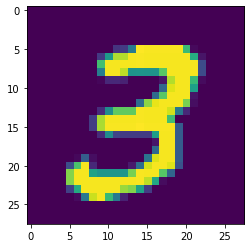

In [4]:
fig, ax = plt.subplots()
im = ax.imshow(x_train[7])

plt.show()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [7]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)


In [8]:
y_test = to_categorical(y_test)

In [9]:
y_train.shape

(60000, 10)

In [20]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(784,)))
model.add(tf.keras.layers.Dense(30, activation="relu"))
model.add(tf.keras.layers.Dense(30, activation="relu"))
model.add(tf.keras.layers.Dense(30, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                310       
Total params: 25,720
Trainable params: 25,720
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer="Adam",
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.Accuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [24]:
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=50, shuffle=True, validation_data=(x_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1774 - accuracy: 0.0036 - false_negatives_2: 3678.0000 - val_loss: 0.2163 - val_accuracy: 0.0016 - val_false_negatives_2: 675.0000
Epoch 2/50
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1645 - accuracy: 0.0030 - false_negatives_2: 3349.0000 - val_loss: 0.1948 - val_accuracy: 0.0028 - val_false_negatives_2: 626.0000
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1618 - accuracy: 0.0031 - false_negatives_2: 3239.0000 - val_loss: 0.2019 - val_accuracy: 0.0018 - val_false_negatives_2: 595.0000
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1542 - accuracy: 0.0033 - false_negatives_2: 3171.0000 - val_loss: 0.1995 - val_accuracy: 0.0029 - val_false_negatives_2: 582.0000
Epoch 5/50
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1502 - accuracy: 0.0040 - false_negatives_2: 3042.0000 - val_loss: 0.2113 - val_accura

In [14]:
x_train.shape

(60000, 784)

In [15]:
y_predict  = model.predict(x_test)

In [ ]:
y_predict[2]

array([0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 3.5091181e-35,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       4.7083056e-22, 0.0000000e+00], dtype=float32)

In [ ]:
x_test[6].shape

(784,)